# Machine Learning

Machine learning is a subfield of aritfitial intelligence, the data science application of machine learning methods, its more helpful to think of machine learning as a means of building models of data

Is involves building mathematical models to help understand data. "learning" enters when we give these model tunable parametes that can be adapted to observed data.



Supervised learning : modeling the relationship between measured featues of data and some label associated with the data. Once model is determined it can be used to apply labels to new unknown data.

Unsupervised learning : modeling the features of a dataset without reference to any label and is often described as "letting the dataset speak for itself". model include tasks such as clustering and dimensionality reduction.


# Introducing Scikit-Learn


## Data Representation in Scikit-Learn

In [ ]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


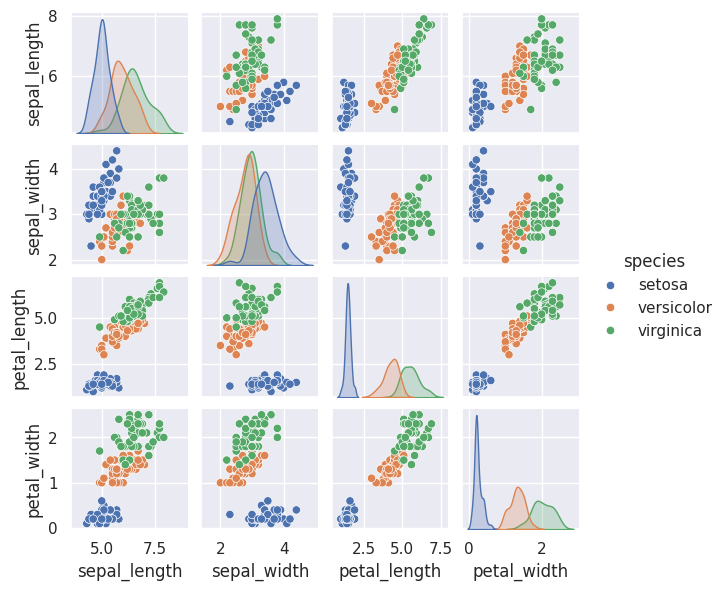

In [ ]:
%matplotlib inline
sns.set()
sns.pairplot(iris, hue='species',size=1.5)

In [ ]:
x = iris.drop('species',axis=1)
x.shape

(150, 4)

In [ ]:
y = iris['species']
y.shape

(150,)

##Scikit-Learn’s Estimator API


**Supervised learning example: Simple linear regression **

[-9.21770993e-01 -5.86317634e-01  1.16399914e+00 -1.24172396e+00
 -1.98523022e+00  1.30670891e+00  7.37807059e-01  3.79111282e-01
  9.89200864e-04 -1.10503482e+00 -9.43307177e-01 -7.20370427e-01
  2.28128940e+00  3.49672691e-02 -6.74568670e-01  2.18137822e-01
  1.16688402e+00  2.80148303e-01  5.60852769e-01  5.76143634e-02
  2.65042898e-01 -2.21096759e+00 -2.86614414e-02 -2.63492759e-01
  1.31209035e+00  9.43398144e-01  8.39760964e-01 -7.79537303e-01
  3.82895137e-02  5.13981677e-01 -4.23819862e-03 -2.81324264e+00
 -7.38794621e-01  1.11941195e+00  3.86052266e-01 -1.09707518e+00
  1.20804571e+00  5.91242949e-01  6.03910792e-02  5.28760214e-01
  1.97494604e+00 -3.04387933e-01  1.11886785e+00  9.32145138e-01
  8.28239570e-01  2.62975266e-02 -9.97210305e-01 -2.13144788e+00
 -1.66180579e+00 -3.66537925e-01]


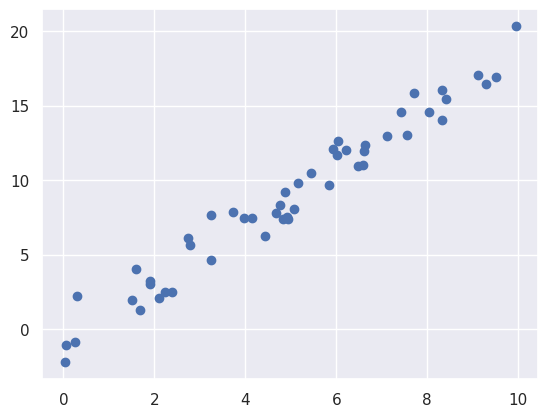

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(60)
print(rng.randn(50))
x = 10 * rng.rand(50)

y = 2 * x - 1 + rng.randn(50)
plt.scatter(x,y)


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression()

In [ ]:
X = x[:,np.newaxis]

**Model.fit**
fit() calculates the best-fit line by finding the optimal values for the slope (coef_) and intercept (intercept_) to minimize the mean squared error between predictions and actual values.


In [ ]:
model.fit(X,y)

LinearRegression()

In [ ]:
model.coef_

array([1.95382619])

In [ ]:
model.intercept_

np.float64(-0.8330470240562953)

In [ ]:
xfit = np.linspace(-1,11)
xfit.shape

(50,)

In [ ]:
Xfit = xfit[:,np.newaxis]
print(Xfit.shape)
yfit = model.predict(Xfit)

(50, 1)


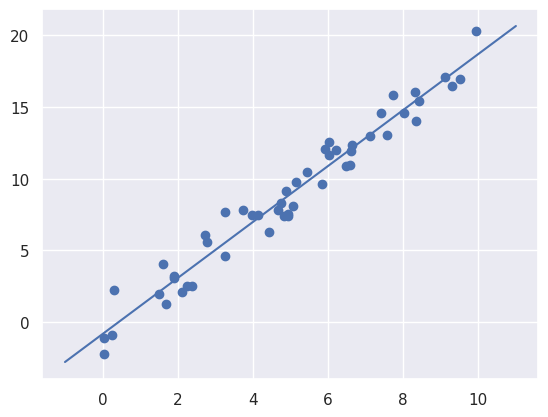

In [ ]:
plt.scatter(x,y)
plt.plot(xfit,yfit)

In [ ]:
model.get_metadata_routing()

{'fit': {'sample_weight': None}, 'score': {'sample_weight': None}}

In [ ]:
model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [ ]:
model.score(X,y)

0.9587501864456768

## Application: Exploring Handwritten Digits

In [ ]:
from sklearn.datasets import load_digits

digits = load_digits()
digits.images.shape

(1797, 8, 8)

In [ ]:
import matplotlib.pyplot as plt

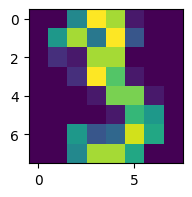

In [ ]:
plt.figure(figsize=(2,2))
plt.imshow(digits.images[3])

In [ ]:
X = digits.data
X.shape

(1797, 64)

In [ ]:
y = digits.target
y.shape

(1797,)

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,random_state=0)

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain,ytrain)

GaussianNB()

In [ ]:
y_model = model.predict(Xtest)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(ytest,y_model)

0.8333333333333334

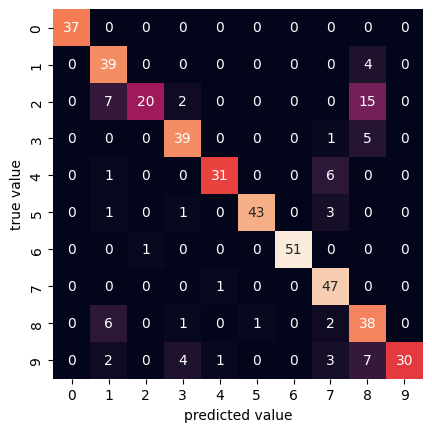

In [ ]:
mat = confusion_matrix(ytest,y_model)
import seaborn as sns
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

# In Depth: Naive Bayes Classification

## Gaussian Naive Bayes

In [ ]:
from sklearn.datasets import make_blobs
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

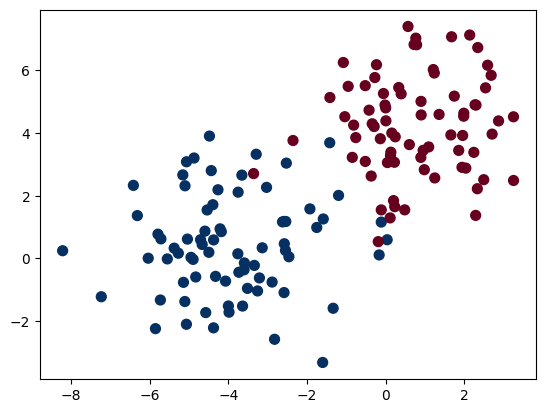

In [ ]:
X,y = make_blobs(150,2,centers=2,random_state=3,cluster_std=1.5)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='RdBu')

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X,y);

In [ ]:
model.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [ ]:
model.get_metadata_routing()

{'fit': {'sample_weight': None}, 'partial_fit': {'classes': None, 'sample_weight': None}, 'score': {'sample_weight': None}}

In [ ]:
rng = np.random.RandomState(0)
Xnew = [-6,-14] + [14,18] * rng.rand(2000,2)
ynew = model.predict(Xnew)

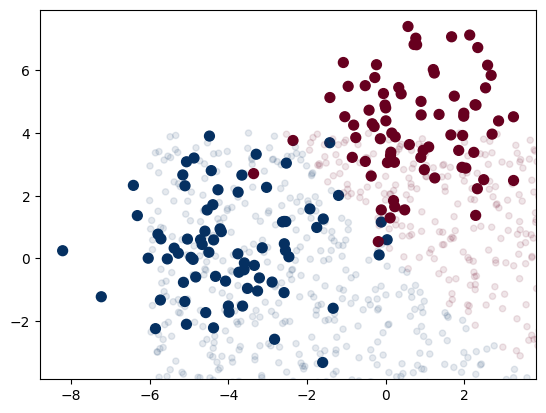

In [ ]:
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:,0],Xnew[:,1],c=ynew,s=20,cmap='RdBu',alpha=0.1)
plt.axis(lim);

In [ ]:
yprob = model.predict_proba(Xnew)
yprob

array([[6.75906154e-01, 3.24093846e-01],
       [4.83923938e-02, 9.51607606e-01],
       [1.12746308e-02, 9.88725369e-01],
       ...,
       [7.37084807e-11, 1.00000000e+00],
       [7.47795954e-01, 2.52204046e-01],
       [7.84006719e-03, 9.92159933e-01]])

## Multinomial Naive Bayes

In [ ]:
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [ ]:
categories = ['talk.religion.misc', 'soc.religion.christian', 'sci.space','comp.graphics']

train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test',categories=categories)

In [ ]:
print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

In [ ]:
model = make_pipeline(TfidfVectorizer(),MultinomialNB())


In [ ]:
model.fit(train.data,train.target)
labels = model.predict(test.data)

Text(113.92222222222219, 0.5, 'predicted label')

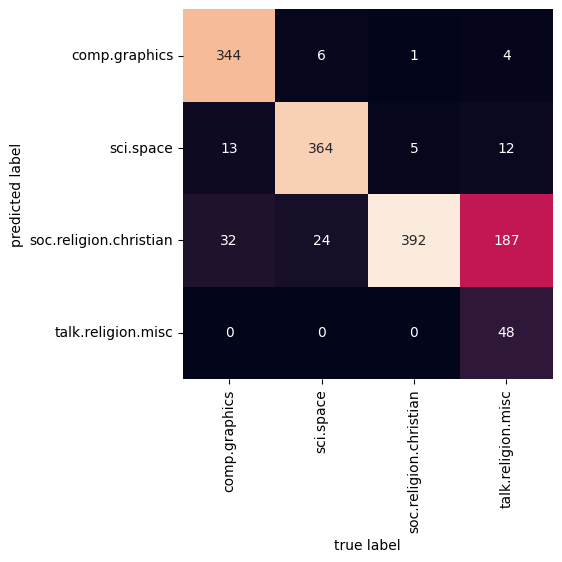

In [ ]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target,labels)
sns.heatmap(mat.T,square=True,annot=True,fmt='d',cbar=False,xticklabels=train.target_names,yticklabels=train.target_names)

plt.xlabel('true label')
plt.ylabel('predicted label')